# CIFAR10 DATASET


In [60]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [61]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [62]:
X_train.shape

(50000, 32, 32, 3)

In [63]:
X_test.shape

(10000, 32, 32, 3)

In [64]:
y_train.shape

(50000, 1)

In [65]:
y_test.shape

(10000, 1)

In [66]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

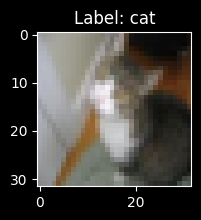

In [67]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))


plot_sample(101)

In [68]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN


In [69]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(32, 32, 3), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dropout(0.25, name="dropout_layer_1"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

In [70]:
ann.layers

In [71]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               393344    
                                                                 
 dropout_layer_1 (Dropout)   (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
optimizer = Adam()
epochs = 5
ann.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [73]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_ann",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/cifar10_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    # callbacks=[
    #     ann_checkpoint_callback,
    #     ann_tensorboard_callback,
    #     ann_csvlogger_callback,
    # ],
)

Epoch 1/5


2023-08-11 21:43:40.728386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


621/625 [============================>.] - ETA: 0s - loss: 4.1620 - sparse_categorical_accuracy: 0.1879

2023-08-11 21:43:45.709020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 9ms/step - loss: 4.1530 - sparse_categorical_accuracy: 0.1882 - val_loss: 2.4795 - val_sparse_categorical_accuracy: 0.2157
Epoch 2/5
625/625 [==============================] - 5s 8ms/step - loss: 2.3135 - sparse_categorical_accuracy: 0.2456 - val_loss: 2.1585 - val_sparse_categorical_accuracy: 0.2304
Epoch 3/5
625/625 [==============================] - 5s 8ms/step - loss: 2.0705 - sparse_categorical_accuracy: 0.2719 - val_loss: 2.1452 - val_sparse_categorical_accuracy: 0.2567
Epoch 4/5
625/625 [==============================] - 5s 9ms/step - loss: 2.0155 - sparse_categorical_accuracy: 0.2833 - val_loss: 1.9711 - val_sparse_categorical_accuracy: 0.3098
Epoch 5/5
625/625 [==============================] - 5s 8ms/step - loss: 1.9884 - sparse_categorical_accuracy: 0.2901 - val_loss: 1.8986 - val_sparse_categorical_accuracy: 0.3153


In [74]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 2.5081678152084352
Validation loss: 2.1305877447128294
0.255805 Training accuracy with a standard deviation of 0.037055
0.265580 Validation accuracy with a standard deviation of 0.040576


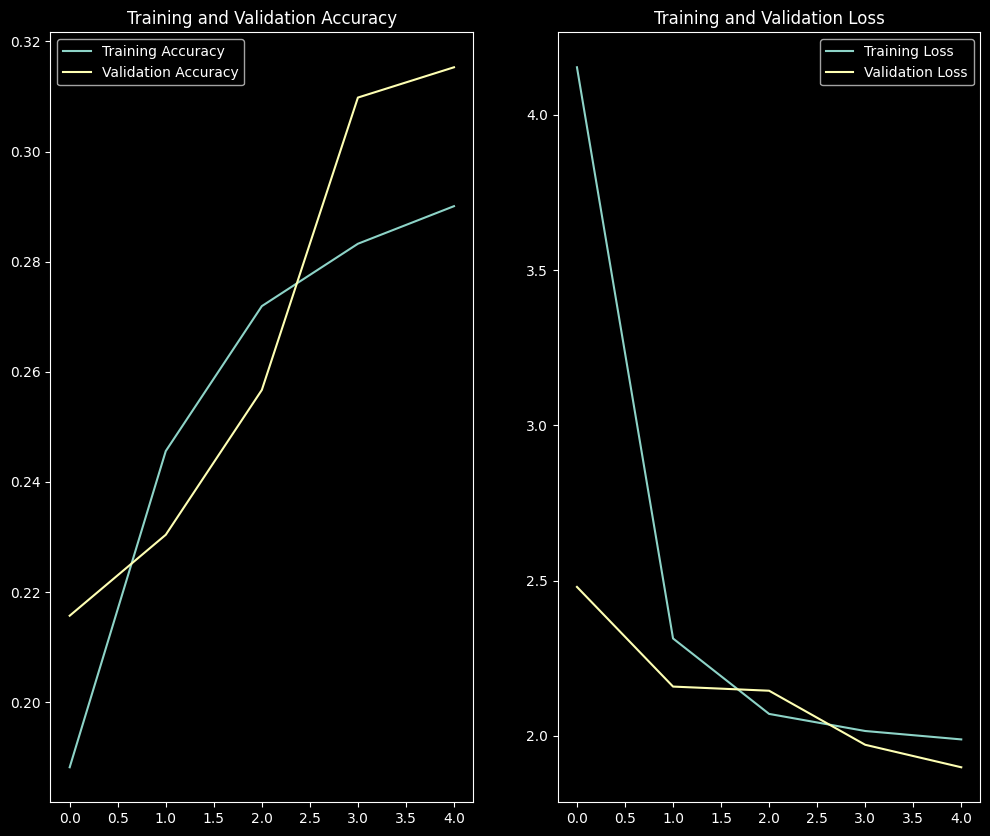

In [75]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_ann_acc_loss.png", bbox_inches="tight")

In [76]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 1.8809 - sparse_categorical_accuracy: 0.3135
Test loss: 1.8809263706207275
Test accuracy: 0.31349998712539673


In [77]:
y_pred = ann.predict(X_test)

 70/313 [=====>........................] - ETA: 0s

2023-08-11 21:44:10.122081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


## CNN

In [78]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            input_shape=(32, 32, 3),
            name="conv_layer_1",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_1"),
        # Conv2D(
        #     filters=64,
        #     kernel_size=3,
        #     activation="relu",
        #     padding="same",
        #     strides=1,
        #     name="conv_layer_2",
        # ),
        # MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_2"),
        Dropout(0.25, name="dropout_layer_1"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [79]:
cnn.layers

In [80]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_layer_1 (Dropout)   (None, 16, 16, 32)        0         
                                                                 
 flatten_layer (Flatten)     (None, 8192)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               1048704   
                                                                 
 final_layer (Dense)         (None, 10)                1290      
                                                               

In [81]:
cnn.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [82]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_cnn",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/cifar10_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    # callbacks=[
    #     cnn_checkpoint_callback,
    #     cnn_tensorboard_callback,
    #     cnn_csvlogger_callback,
    # ],
)

Epoch 1/5


2023-08-11 21:44:15.673154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


624/625 [============================>.] - ETA: 0s - loss: 1.6945 - sparse_categorical_accuracy: 0.3949

2023-08-11 21:44:28.117881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 14s 22ms/step - loss: 1.6940 - sparse_categorical_accuracy: 0.3951 - val_loss: 1.4696 - val_sparse_categorical_accuracy: 0.4812
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 1.4582 - sparse_categorical_accuracy: 0.4825 - val_loss: 1.4410 - val_sparse_categorical_accuracy: 0.4892
Epoch 3/5
625/625 [==============================] - 10s 16ms/step - loss: 1.4492 - sparse_categorical_accuracy: 0.4893 - val_loss: 1.4273 - val_sparse_categorical_accuracy: 0.5013
Epoch 4/5
625/625 [==============================] - 9s 15ms/step - loss: 1.4737 - sparse_categorical_accuracy: 0.4862 - val_loss: 1.5263 - val_sparse_categorical_accuracy: 0.4570
Epoch 5/5
625/625 [==============================] - 11s 18ms/step - loss: 1.5257 - sparse_categorical_accuracy: 0.4786 - val_loss: 1.5121 - val_sparse_categorical_accuracy: 0.4885


In [83]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 1.5201403141021728
Validation loss: 1.4752713441848755
0.466340 Training accuracy with a standard deviation of 0.035802
0.483440 Validation accuracy with a standard deviation of 0.014710


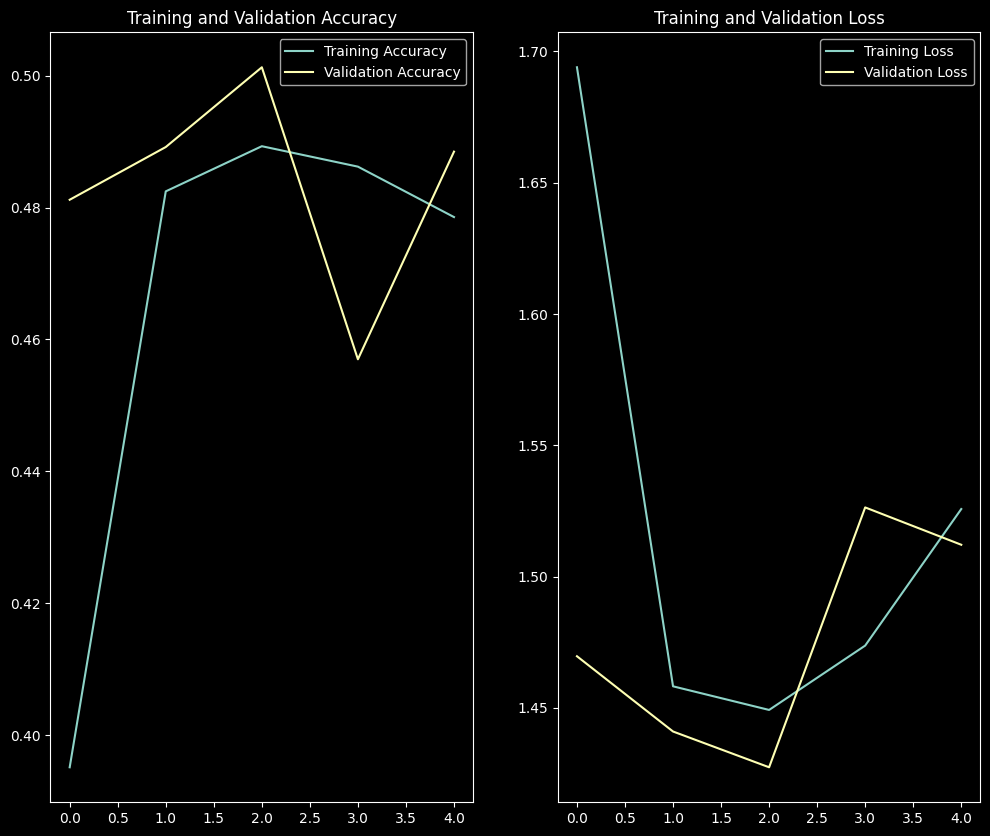

In [84]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [85]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.4828 - sparse_categorical_accuracy: 0.4943
Test loss: 1.4828294515609741
Test accuracy: 0.4943000078201294


In [86]:
y_pred = cnn.predict(X_test)

 30/313 [=>............................] - ETA: 0s

2023-08-11 21:45:20.859878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step
